# Training and Testing DQN Agents in Gym Environments

### Imports

In [1]:
from agent_utils import *
# Lazy, I know but this will be refined!

### The Cartpole Environment

Environment details can be found [here](https://gymnasium.farama.org/environments/classic_control/cart_pole/)

In [2]:
pass
"""##### Observation Space

|    |      Observation      |         Min         |        Max        |
|:--:|:---------------------:|:-------------------:|:-----------------:|
| 0  | Cart Position         | -4.8                | 4.8               |
| 1  | Cart Velocity         | -$\infty$           | $\infty$          |
| 2  | Pole Angle            | ~ -0.418 rad (-24°) | ~ 0.418 rad (24°) |
| 3  | Pole Angular Velocity | -$\infty$           | $\infty$          |


##### Action Space

0: Push cart to the left
1: Push cart to the right
With a maximum of 500 steps allowed

##### Rewards

Goal is to keep the pole upright for as long as possible, a reward of +1 for every step taken, including the termination step, is allotted. The solved threshold for v0 was 195 but the default threshold of the environment is set at 475

##### Starting State

All observations are assigned a uniformly random value in (-0.05, 0.05)

##### Episode Termination

Episode ends when:
1. Pole Angle is greater than ±12°
2. Cart Position is greater than ±2.4
3. Episode longer than 500"""

'##### Observation Space\n\n|    |      Observation      |         Min         |        Max        |\n|:--:|:---------------------:|:-------------------:|:-----------------:|\n| 0  | Cart Position         | -4.8                | 4.8               |\n| 1  | Cart Velocity         | -$\\infty$           | $\\infty$          |\n| 2  | Pole Angle            | ~ -0.418 rad (-24°) | ~ 0.418 rad (24°) |\n| 3  | Pole Angular Velocity | -$\\infty$           | $\\infty$          |\n\n\n##### Action Space\n\n0: Push cart to the left\n1: Push cart to the right\nWith a maximum of 500 steps allowed\n\n##### Rewards\n\nGoal is to keep the pole upright for as long as possible, a reward of +1 for every step taken, including the termination step, is allotted. The solved threshold for v0 was 195 but the default threshold of the environment is set at 475\n\n##### Starting State\n\nAll observations are assigned a uniformly random value in (-0.05, 0.05)\n\n##### Episode Termination\n\nEpisode ends when:\n1. 

In [3]:
# Initialise Environment and set up Agent
env = gym.make('CartPole-v1', render_mode='rgb_array')

# The default spec reward seems to be set at 500 even though the solved threshold is 195.
# I have overriden this and set it to 240 below.
cartpole_agent = Agent(env)

In [4]:
# Set up the DQN parameters

input_size = cartpole_agent.env.observation_space.shape[0]
output_size = cartpole_agent.env.action_space.n

# DQN Parameters
layers = [input_size, 64, 64, output_size]  # DQN Architecture
activation = 'relu'
weights = 'xunif'
optim = 'Adam'
learning_rate = 1e-3
dqn_params = dict(layers=layers, activation=activation, weights=weights, optim=optim, learning_rate=learning_rate)

In [5]:
# Set up the Training Parameters
epsilon = 1 # The epsilon at the start of learning
eps_decay = 0.995  # Epsilon is reduced by 1-eps_decay every episode
replay_buffer = 100000
batch_size = 64
epsilon_end = 0.01
episodes = 1000
update_frequency = 5
clip_rewards = False
gamma = 1 # No discount used

# Aggregate them into a dict for mapping

training_params = dict(epsilon=epsilon, eps_decay=eps_decay, replay_buffer=replay_buffer,
                           batch_size=batch_size, epsilon_end=epsilon_end, episodes=episodes,
                           update_frequency=update_frequency, dqn_params=dqn_params, clip_rewards=clip_rewards)


In [6]:
# Show a random rendering
cartpole_agent.save_random_renders(episodes=1,plots=False,save_every=1,nb_render=True)

saving a random render
Random episode 1 with reward 16.0
16 steps


<img src="images/CartPole-v1/random.gif" width="750" align="center">

In [7]:
# Train Agent
run_stats = cartpole_agent.train_agent(show_time=True, **training_params)

Training DQN Agent...
episode  100 of max 1000
episode  200 of max 1000
episode  300 of max 1000
episode  400 of max 1000
episode  500 of max 1000
episode  600 of max 1000
episode  700 of max 1000
Environment solved within 743 episodes.
Average Score: 476.32
Training is complete
Execution time: 6.0 minutes, 17.716574907302856 seconds.


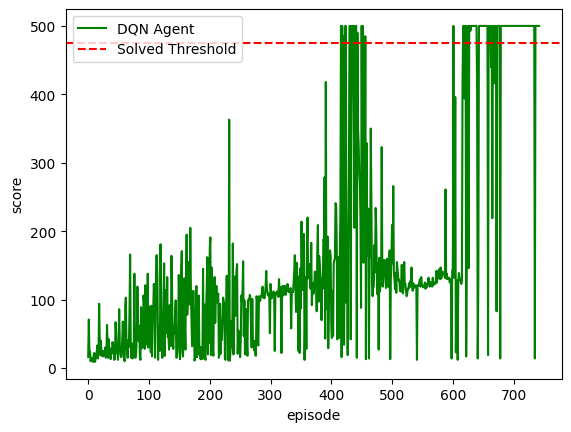

In [8]:
# Plot Training curve
cartpole_agent.plot_episodes(run_stats['episode_rewards'])

In [9]:
# Show a trained rendering
cartpole_stats=cartpole_agent.evaluate_agent(1, plots=False, save_every=1,nb_render=True)

Evaluating Trained Agent...
Episode 1 with reward 500.0
500 steps


<img src="images/CartPole-v1/evaluation.gif" width="750" align="center">

### The Lunar Lander

Environment details can be found [here](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

In [10]:
pass
"""This is the discrete version.

#### Observation Space
An 8-D vector:
1 and 2. the coordinates of the lander in x & y
3 and 4. its linear velocities in x & y
5. its angle
6. its angular velocity,
7 and 8. two booleans that represent whether each leg is in contact with the ground or not.


#### Action Space
There are four discrete actions available:

0: do nothing
1: fire left orientation engine
2: fire main engine
3: fire right orientation engine

#### Rewards
After every step a reward is granted. The total reward of an episode is the sum of the rewards for all the steps within that episode. For each step, the reward:

is increased/decreased the closer/further the lander is to the landing pad.
is increased/decreased the slower/faster the lander is moving.
is decreased the more the lander is tilted (angle not horizontal).
is increased by 10 points for each leg that is in contact with the ground.
is decreased by 0.03 points each frame a side engine is firing.
is decreased by 0.3 points each frame the main engine is firing.
The episode receive an additional reward of -100 or +100 points for crashing or landing safely respectively.
An episode is considered a solution if it scores at least 200 points.

#### Starting State
The lander starts at the top center of the viewport with a random initial force applied to its center of mass.

#### Episode Termination
The episode finishes if:

the lander crashes (the lander body gets in contact with the moon);

the lander gets outside of the viewport (x coordinate is greater than 1);

the lander is not awake. From the Box2D docs, a body which is not awake is a body which doesn’t move and doesn’t collide with any other body:"""

'This is the discrete version.\n\n#### Observation Space\nAn 8-D vector:\n1 and 2. the coordinates of the lander in x & y\n3 and 4. its linear velocities in x & y\n5. its angle\n6. its angular velocity,\n7 and 8. two booleans that represent whether each leg is in contact with the ground or not.\n\n\n#### Action Space\nThere are four discrete actions available:\n\n0: do nothing\n1: fire left orientation engine\n2: fire main engine\n3: fire right orientation engine\n\n#### Rewards\nAfter every step a reward is granted. The total reward of an episode is the sum of the rewards for all the steps within that episode. For each step, the reward:\n\nis increased/decreased the closer/further the lander is to the landing pad.\nis increased/decreased the slower/faster the lander is moving.\nis decreased the more the lander is tilted (angle not horizontal).\nis increased by 10 points for each leg that is in contact with the ground.\nis decreased by 0.03 points each frame a side engine is firing.\ni

In [11]:
# Initialise Environment and set up Agent
env = gym.make("LunarLander-v2", render_mode='rgb_array')
lunar_agent = Agent(env)

In [12]:
# Set up the DQN parameters
input_size = lunar_agent.env.observation_space.shape[0]
output_size = lunar_agent.env.action_space.n

# DQN Parameters
layers = [input_size, 256, 128, output_size]  # DQN Architecture
activation = 'relu'
weights = 'xunif'
optim = 'Adam'
learning_rate = 1e-4
dqn_params = dict(layers=layers, activation=activation, weights=weights, optim=optim, learning_rate=learning_rate)

In [13]:
# Training Parameters
epsilon = 1
eps_decay = 0.995  # Epsilon is reduced by 1-eps_decay every episode
replay_buffer = 100000
batch_size = 64
epsilon_end = 0.01
episodes = 2000
update_frequency = 5
clip_rewards = False
gamma = 1

# Aggregate them into a dict for mapping
training_params = dict(epsilon=epsilon, eps_decay=eps_decay, replay_buffer=replay_buffer,
                       batch_size=batch_size, epsilon_end=epsilon_end, episodes=episodes,
                       update_frequency=update_frequency, dqn_params=dqn_params, clip_rewards=clip_rewards,
                       gamma=gamma)

In [14]:
# Show a random rendering
lunar_agent.save_random_renders(episodes=1,plots=False,save_every=1,nb_render=True)

saving a random render
Random episode 1 with reward -275.3223304785538
96 steps


<img src="images/LunarLander-v2/random.gif" width="750" align="center">

In [15]:
# Train Agent
run_stats = lunar_agent.train_agent(show_time=True, **training_params)

Training DQN Agent...
episode  200 of max 2000
episode  400 of max 2000
Environment solved within 531 episodes.
Average Score: 200.0335983498014
Training is complete
Execution time: 20.0 minutes, 51.538439989089966 seconds.


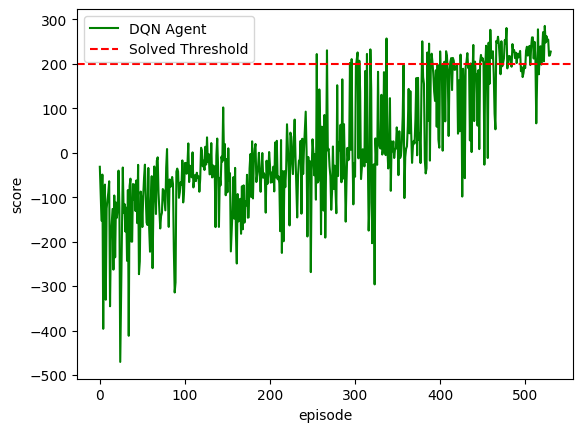

In [16]:
# Plot Training curve
lunar_agent.plot_episodes(run_stats['episode_rewards'])

In [17]:
# Show a trained rendering
lunar_stats=lunar_agent.evaluate_agent(1, plots=False, save_every=1,nb_render=True)

Evaluating Trained Agent...
Episode 1 with reward 242.72546708770264
328 steps


<img src="images/LunarLander-v2/evaluation.gif" width="750" align="center">